In [1]:
import networkx as nx
import numpy as np

In [2]:

# Inorder traversal
def inorder(root):
    pass

def elems_single(root):
    if root is not None:
        elems = root.keys()
        return list(elems)
    return []

def all_elems(root1,root2):
    elems = elems_single(root1)
    elems.extend(elems_single(root2))
    return set(elems)

# Insert a node
def insert(node, key):
    node[key[0]] = key[1]
    return node

# added
def search_col(root, col):
    return (root.get(col) is not None)

def search_value(root, mod):
    return ( mod in list(root.values()))

# get the modularity (deltaQ) of a col k
def extract_col(root, col):
    return root.get(col)

def update_tree(root, key, value):
    root[key[0]] = value
    return root



# Find the inorder successor
def minValueNode(node):
    min_value = min(list(node.values()))
    for key,value in node.items():
        if value == min_value:
            return key,value

def maxValueNode(node):
    max_value = max(list(node.values()))
    for key,value in node.items():
        if value == max_value:
            return key,value

# Deleting a node
def deleteNode(root, key):
    del root[key[0]]
    return root

In [3]:
import sys
class MaxHeap:
  
    def __init__(self, maxsize):
          
        self.maxsize = maxsize
        self.size = 0
        self.Heap = [[0,0,0]] * (self.maxsize + 1)
        self.Heap[0] = [-1,-1,sys.maxsize]
        self.FRONT = 1
  
    # Function to return the position of
    # parent for the node currently
    # at pos
    def parent(self, pos):
          
        return pos // 2
  
    # Function to return the position of
    # the left child for the node currently
    # at pos
    def leftChild(self, pos):
          
        return 2 * pos
  
    # Function to return the position of
    # the right child for the node currently
    # at pos
    def rightChild(self, pos):
          
        return (2 * pos) + 1
  
    # Function that returns true if the passed
    # node is a leaf node
    def isLeaf(self, pos):
          
        if pos >= (self.size//2) and pos <= self.size:
            return True
        return False
  
    # Function to swap two nodes of the heap
    def swap(self, fpos, spos):
          
        self.Heap[fpos], self.Heap[spos] = (self.Heap[spos], 
                                            self.Heap[fpos])
  
    # Function to heapify the node at pos
    def maxHeapify(self, pos):
  
        # If the node is a non-leaf node and smaller
        # than any of its child
        if not self.isLeaf(pos):
            if (self.Heap[pos][2] < self.Heap[self.leftChild(pos)][2] or
                self.Heap[pos][2] < self.Heap[self.rightChild(pos)][2]):
  
                # Swap with the left child and heapify
                # the left child
                if (self.Heap[self.leftChild(pos)][2] > 
                    self.Heap[self.rightChild(pos)][2]):
                    self.swap(pos, self.leftChild(pos))
                    self.maxHeapify(self.leftChild(pos))
  
                # Swap with the right child and heapify
                # the right child
                else:
                    self.swap(pos, self.rightChild(pos))
                    self.maxHeapify(self.rightChild(pos))
  
    # Function to insert a node into the heap
    def insert(self, element):
          
        if self.size >= self.maxsize:
            return
        self.size += 1
        self.Heap[self.size] = element
  
        current = self.size
  
        while (self.Heap[current][2] > 
               self.Heap[self.parent(current)][2]):
            self.swap(current, self.parent(current))
            current = self.parent(current)      
  
    # Function to print the contents of the heap
    def Print(self):
        for i in range(1, (self.size // 2) + 1):
            print(" PARENT : " + str(self.Heap[i]) + 
                  " LEFT CHILD : " + str(self.Heap[2 * i]) +
                  " RIGHT CHILD : " + str(self.Heap[2 * i + 1]))
  
    # Function to remove and return the maximum
    # element from the heap
    # (dont think we need this)
    def extractMax(self):
  
        popped = self.Heap[self.FRONT]
        self.Heap[self.FRONT] = self.Heap[self.size]
        self.size -= 1
        self.maxHeapify(self.FRONT)
          
        return popped

    # added

    def heapify_all(self,k):
        l = self.leftChild(k)
        r = self.rightChild(k)
        if l < len(self.Heap) and self.Heap[l][2] > self.Heap[k][2]:
            largest = l
        else:
            largest = k
        if r < len(self.Heap) and self.Heap[r][2] > self.Heap[largest][2]:
            largest = r
        if largest != k:
            self.Heap[k], self.Heap[largest] = self.Heap[largest], self.Heap[k]
            self.heapify_all(largest)

    # get the max element of the heap
    def getMax(self):
        return self.Heap[1]    

    def delete(self, element):
        j = -1
        for i in range(1, self.size + 1):
            if((self.Heap[i][0] == element)):
                j = i
                break
        if(j != -1):
            self.Heap[j] = self.Heap[self.size]
            self.size -= 1
            #self.Heap[j], self.Heap[self.FRONT] = self.Heap[self.FRONT], self.Heap[j]
            self.maxHeapify(self.FRONT)  


    def search(self, element):
        for i in range(1, self.size + 1):
            if((self.Heap[i][0] == element[0]) and (self.Heap[i][1] == element[1])):
                return True
        return False    

    def update(self, element, value):
        j = -1
        for i in range(1, self.size + 1):
            if((self.Heap[i][0] == element[0]) and (self.Heap[i][1] == element[1])):
                j = i
                self.Heap[i][2] = value
                break
        if(j != -1):
            el = self.Heap[j]
            el[2] = value
            self.delete(self.Heap[j])
            self.insert(el)
        #self.maxHeapify(1)  

In [4]:
import networkx.algorithms.community as nx_com

In [5]:
class CNM:
    def __init__(self, G):
        self.G = G
        self.sparse = []
        self.num_edges = G.number_of_edges()
        self.degrees = G.degree
        self.num_nodes = G.number_of_nodes()
        self.nodes = list(G.nodes)
        self.heap = MaxHeap(G.number_of_nodes())
        self.communities = []
        self.a = []
        self.modularity = 0
        self.mods = []
        self.best_communities = []
        # to be continued :)
    
    def init_communities(self):
        for node in self.nodes:
            self.communities.append([node])
    
    def delta_i_j_init (self, i,j) :
        if (i in self.G.adj[j]) :
            return 1/(2* self.num_edges) - (self.degrees[i] * self.degrees[j]) / ((2* self.num_edges) **2)
        else :
            return 0
    
    def a_i_init(self, i) :
        return self.degrees[i] / (2 * self.num_edges)
    
    def init_a(self):
        for node in self.nodes:
            val = self.a_i_init(node)
            self.a.append(val)
        
    
    def init_sparse(self):
        n = self.num_nodes
        for i in range(n):
            root = {}
            line_idx = self.nodes[i]
            for j in range(n):
                col_idx = self.nodes[j]
                delta = self.delta_i_j_init(line_idx, col_idx)
                if(delta != 0):
                    #root = insert(root, [col_idx, delta])
                    root = insert(root, [j, delta])
            self.sparse.append(root) 
            
    def init_heap(self):
        for i in range(self.num_nodes):
            if self.sparse[i] is not None:
                node = maxValueNode(self.sparse[i])
                self.heap.insert([i, node[0], node[1]])
    
    def update_heap(self):
        self.heap = None
        self.heap = MaxHeap(len(self.sparse))
        for i in range(len(self.sparse)):
            if bool(self.sparse[i]):
                node = maxValueNode(self.sparse[i])
                self.heap.insert([i, node[0], node[1]])
                
    # returns true if j is connected to i
    def connected_communities(self, i, j):
        # check if atleast 1 node is in the tree of spare[i]
        if self.communities[j] is not None:
            return extract_col(self.sparse[j], i) is not None
        return False  
    
                
    def iterate(self):
        
        # perform one iteration
        # 1) get the max of the heap
        i, j, mod = self.heap.getMax()
        mini = min(i,j)
        maxi = max(i,j)
        j=mini
        i=maxi
        if mod < 0 and not bool(self.best_communities):
            comms= self.communities
            communities_sets = []
            for comm in comms:
                if comm is not None:
                    communities_sets.append(frozenset(comm))
            self.best_communities = communities_sets
            print(nx_com.modularity(self.G,self.best_communities,weight=None))
            
        # update modularity
        self.modularity += mod
        # 2) update all k connected to j or i (update j-th row & j-th col)
#         for k in all_elems(self.sparse[i],self.sparse[j]):
        for k in all_elems(self.sparse[i],self.sparse[j]):
            if(self.communities[k] is not None):
                if (k!=i) and (k!=j):
                    if((self.connected_communities(i, k)) and (self.connected_communities(j, k))):
                        deltaQ_jk = extract_col(self.sparse[j], k)
                        if deltaQ_jk is None:
                            print("deltaQ_jk None in {} {}".format(j, k))
                        deltaQ_ik = extract_col(self.sparse[i], k)
                        if deltaQ_ik is None:
                            print("deltaQ_ik None in {} {}".format(i, k))
                        new_deltaQ_jk = deltaQ_ik + deltaQ_jk
                        self.sparse[j] = update_tree(self.sparse[j], [k, deltaQ_jk], new_deltaQ_jk)
                        self.sparse[k] = update_tree(self.sparse[k], [j, deltaQ_jk], new_deltaQ_jk)
                    # k connected to i but not to j
                    elif((self.connected_communities(i, k)) and (not self.connected_communities(j, k))):
                        deltaQ_ik = extract_col(self.sparse[i], k)
                        new_deltaQ_jk = deltaQ_ik - 2 * self.a[j] * self.a[k]
                        self.sparse[j] = insert(self.sparse[j], [k, new_deltaQ_jk])
                                # added right now 
                        self.sparse[k] = insert(self.sparse[k], [j, new_deltaQ_jk])

                            # k connected to j but not to i    
                    elif((self.connected_communities(j, k)) and (not self.connected_communities(i, k))):
                        deltaQ_jk = extract_col(self.sparse[j], k)
                        new_deltaQ_jk = deltaQ_jk - 2 * self.a[i] * self.a[k]
                        self.sparse[j] = update_tree(self.sparse[j], [k, deltaQ_jk], new_deltaQ_jk)
                                # because of the symmetry
                        self.sparse[k] = update_tree(self.sparse[k], [j, deltaQ_jk], new_deltaQ_jk)
                    
        # 3) merge i and j (remove ith col and row)   
        
        # remove i-th col (delete all nodes that have col=i from the trees in the sparse matrix)
        for k in all_elems(self.sparse[i], None):
            mod = extract_col(self.sparse[k], i)
            if mod is not None:
                self.sparse[k] = deleteNode(self.sparse[k], [i, mod])
                
        # remove i-th row
        self.sparse[i] = None
        
        # update the heap   
        #self.heap = MaxHeap(len(self.sparse))
        self.update_heap()

        # update the communities array
        for node in self.communities[i]:
#             print("merging {} inside of {}".format(i, j))
            
            self.communities[j].append(node)
        #self.communities.pop(i)
        self.communities[i] = None
        # update a 
        self.a[j] += self.a[i]
        self.a[i] = 0
    def run(self):
        self.init_a()
        self.init_communities()
        self.init_sparse()
        self.init_heap()
        for i in range(self.num_nodes - 1):
            self.iterate()
            self.mods.append(self.modularity)
            if self.heap.size == 0:
                break
        
#         print("final result")
#         print(self.communities)     
            

In [6]:
import time
import matplotlib.pyplot as plt

In [7]:
def cnm_algo(G):
    cnm = CNM(G)
    debut =time.time()
    cnm.run()
    fin = time.time() - debut
    mod = nx_com.modularity(G,cnm.best_communities,weight=None)
    print("modularity: ",mod)
    print("Execution time: ",fin)
    plt.plot(cnm.mods)

In [8]:
g1 = nx.read_edgelist("./benchmarks/0.1/network.dat", create_using=nx.DiGraph(), nodetype=int)
g2 = nx.read_edgelist("./benchmarks/0.2/network.dat", create_using=nx.DiGraph(), nodetype=int)
g3 = nx.read_edgelist("./benchmarks/0.3/network.dat", create_using=nx.DiGraph(), nodetype=int)
g4 = nx.read_edgelist("./benchmarks/0.4/network.dat", create_using=nx.DiGraph(), nodetype=int)
g5 = nx.read_edgelist("./benchmarks/0.5/network.dat", create_using=nx.DiGraph(), nodetype=int)
g6 = nx.read_edgelist("./benchmarks/0.6/network.dat", create_using=nx.DiGraph(), nodetype=int)
g7 = nx.read_edgelist("./benchmarks/0.7/network.dat", create_using=nx.DiGraph(), nodetype=int)
g8 = nx.read_edgelist("./benchmarks/0.8/network.dat", create_using=nx.DiGraph(), nodetype=int)
g9 = nx.read_edgelist("./benchmarks/0.9/network.dat", create_using=nx.DiGraph(), nodetype=int)

0.37886259040105197
modularity:  0.37886259040105197
Execution time:  0.004878044128417969


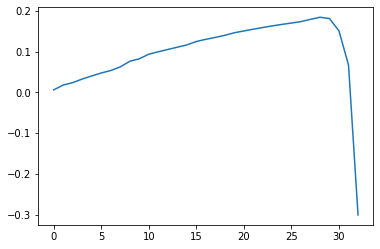

In [9]:
G = nx.karate_club_graph()
cnm_algo(G)

0.4898144851865036
modularity:  0.4898144851865036
Execution time:  0.01659226417541504


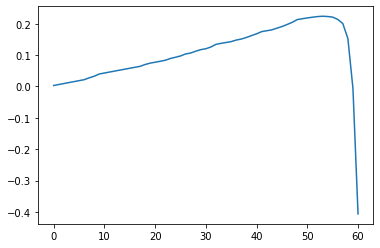

In [10]:
g = nx.read_gml('dolphins.gml', label='id')
cnm_algo(g)

0.5667950256673648
modularity:  0.5667950256673648
Execution time:  0.09076952934265137


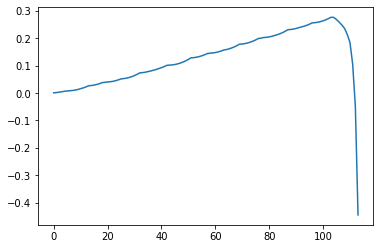

In [11]:
g = nx.read_gml('football.gml', label='id')
cnm_algo(g)

0.4127197265625
modularity:  0.4127197265625
Execution time:  0.057615041732788086


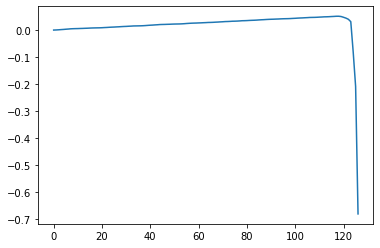

In [12]:
cnm_algo(g1)

0.25146484375
modularity:  0.25146484375
Execution time:  0.057579994201660156


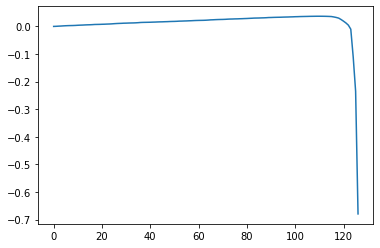

In [13]:
cnm_algo(g2)

0.198486328125
modularity:  0.198486328125
Execution time:  0.05758357048034668


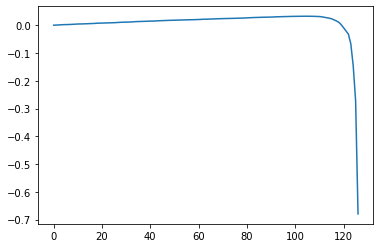

In [14]:
cnm_algo(g3)

0.1558837890625
modularity:  0.1558837890625
Execution time:  0.07804393768310547


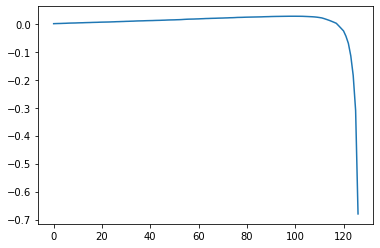

In [15]:
cnm_algo(g4)

0.1319580078125
modularity:  0.1319580078125
Execution time:  0.07319760322570801


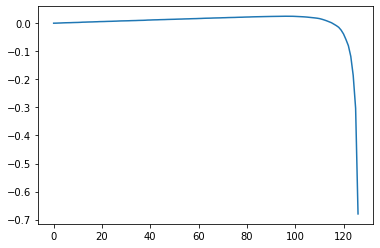

In [16]:
cnm_algo(g5)

0.1204833984375
modularity:  0.1204833984375
Execution time:  0.18057799339294434


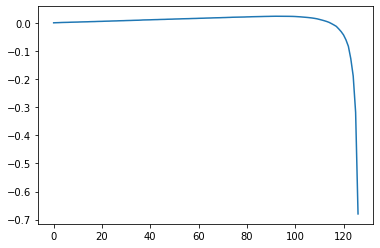

In [17]:
cnm_algo(g6)

0.126953125
modularity:  0.126953125
Execution time:  0.07439088821411133


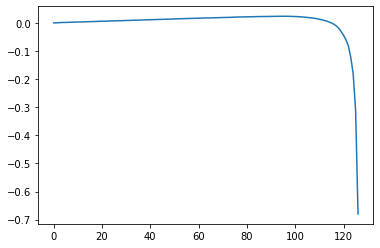

In [18]:
cnm_algo(g7)

0.1297607421875
modularity:  0.1297607421875
Execution time:  0.07222461700439453


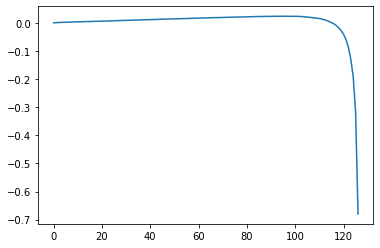

In [19]:
cnm_algo(g8)

0.1204833984375
modularity:  0.1204833984375
Execution time:  0.06249499320983887


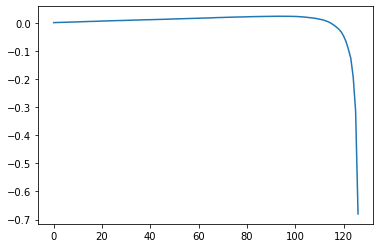

In [20]:
cnm_algo(g9)